Accuracy of KNN model with k=7: 1.00


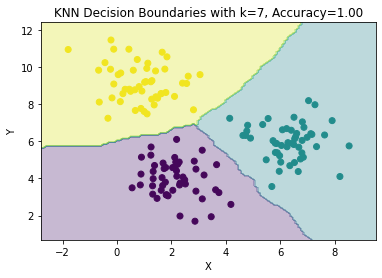

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the KNN model on the training set
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluate the accuracy of the model on the testing set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of KNN model with k={k}: {accuracy:.2f}")


# plot your different results
# Create a meshgrid of points to use for the contour plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use the KNN model to make predictions on the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points with different colors for the different classes
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')

# Create a contour plot of the decision boundaries of the KNN model
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"KNN Decision Boundaries with k={k}, Accuracy={accuracy:.2f}")
plt.show()
